Data preparation

In [ ]:
!pip3 install openmim
!mim install mmcv-full

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 2.5 MB/s 
     |████████████████████████████████| 235 kB 16.6 MB/s 
     |████████████████████████████████| 51 kB 3.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     |████████████████████████████████| 40.6 MB 9.9 MB/s 
     |████████████████████████████████| 190 kB 7.3 MB/s 


In [ ]:
!git clone https://github.com/open-mmlab/mmflow.git
%cd mmflow
!pip install -e .

Cloning into 'mmflow'...
remote: Enumerating objects: 3110, done.
remote: Counting objects: 100% (900/900), done.
remote: Compressing objects: 100% (375/375), done.
remote: Total 3110 (delta 609), reused 711 (delta 518), pack-reused 2210
Receiving objects: 100% (3110/3110), 22.03 MiB | 16.88 MiB/s, done.
Resolving deltas: 100% (1896/1896), done.
/content/mmflow
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmflow
  Running setup.py develop for mmflow


In [ ]:
import mmflow
print(mmflow.__version__)

0.5.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!mkdir /content/drive/*****/Flow/

In [ ]:
!mkdir /content/drive/*****/FlowIm

In [ ]:
!mkdir $PROJECT_PATH


mkdir: missing operand
Try 'mkdir --help' for more information.


In [2]:
from mmflow.apis import init_model, inference_model
from mmflow.datasets import visualize_flow, write_flow
import mmcv

# Specify the path to model config and checkpoint file
config_file = '/content/mmflow/configs/raft/raft_8x2_100k_mixed_368x768.py'
checkpoint_file = '/content/drive/*****/raft_8x2_100k_mixed_368x768.pth'

# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cuda:0')


In [ ]:
import torch
from torchvision import datasets, transforms
from os import walk
from PIL import Image
#read the image
import os
data=[]
i=0

Lines_train = ['real,fake,target,target1']
for (dirpath, dirnames, filenames) in walk('/content/drive*****/Real'):
  for names in filenames:
    if names.endswith(".jpg"):
       img1='/content/drive/*****/Real/'+names
       img2='/content/drive/*****/Fake/'+names
       result = inference_model(model, img1, img2)
       write_flow(result, flow_file='/content/drive/*****/Flow/'+names[:-4]+'.flo')

       result1 = inference_model(model, img2,img1)
       write_flow(result1, flow_file='/content/drive/*****/FlowInv/'+names[:-4]+'.flo')

      Lines_train.append('Real/'+names+','  +  'Fake/'+names+ ','  +   'Flow/'+names[:-4]+'.flo'  + ','  +    'FlowInv/'+names[:-4]+'.flo')
# print(Lines_train)
with open('../data.csv', 'w') as f:
    for line in Lines_train:
        f.write(line)
        f.write('\n')
    # newlist.append(names)
    # i=i+1
    # im = Image.open(dirpath+'/'+names)
    # newsize = (640 , 480 )
    # im = im.resize(newsize)
    # im = im.convert('RGB')

    # # rotate image
    # angle = 180
    # rotated_img = im.rotate(angle)

    # im.save("data/"+'0_'+str(i)+'.jpg')
    # i = i + 1
    # rotated_img.save("data/" + '0_' + str(i) + '.jpg')


Training

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")

In [ ]:
%cd ..

/content


In [ ]:
# !rm -rf *
!wget https://github.com/PeterWang512/FALdetector/archive/refs/heads/master.zip
!unzip master.zip > /dev/null
!rm master.zip
!mv -f FALdetector-master/* .
!wget https://www.dropbox.com/s/rb8zpvrbxbbutxc/global.pth?dl=0 -q -O ./weights/global.pth
!wget https://www.dropbox.com/s/pby9dhpr6cqziyl/local.pth?dl=0 -q -O ./weights/local.pth

print("Analyzing...")

--2022-08-12 22:07:09--  https://github.com/PeterWang512/FALdetector/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/PeterWang512/FALdetector/zip/refs/heads/master [following]
--2022-08-12 22:07:09--  https://codeload.github.com/PeterWang512/FALdetector/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.121.10
Connecting to codeload.github.com (codeload.github.com)|140.82.121.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [    <=>             ]  12.30M  14.3MB/s    in 0.9s    

2022-08-12 22:07:10 (14.3 MB/s) - ‘master.zip’ saved [12896548]

Analyzing...


In [ ]:
import os
from urllib.parse import urlparse
import requests
from IPython.display import display, Image as IM
import numpy as np
import torch
import torchvision.transforms as transforms
from PIL import Image
from networks.drn_seg import DRNSeg
from utils.tools import *
from utils.visualize import *
from urllib.parse import urlparse
import global_classifier

In [ ]:
from torch.utils.data import Dataset
import pandas as pd
import io
import numpy as np
from PIL import Image

class TrainData(Dataset):

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.paths = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transforms.Compose([
          transforms.ToTensor(),
          transforms.Normalize(
              mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        real_path = os.path.join(self.root_dir,
                                self.paths.iloc[idx, 0])
        real_im = self.read_im(real_path)
        
        fake_path = os.path.join(self.root_dir,
                                self.paths.iloc[idx, 1])
        fake_im = self.read_im(fake_path)

        flow_path = os.path.join(self.root_dir,
                                self.paths.iloc[idx, 2])
        flow_im = self.read_flow(flow_path)

        flow_inv_path = os.path.join(self.root_dir,
                                self.paths.iloc[idx, 3])
        flow_inv_im = self.read_flow(flow_inv_path)

        return real_im,fake_im,flow_im,flow_inv_im

    def read_im(self, path):


        im_w, im_h = Image.open(path).size
        face = Image.open(path).convert('RGB')

        # if no_crop:
        #     face = Image.open(path).convert('RGB')
        # else:
        #     faces = face_detection(path, verbose=False)
        #     if len(faces) == 0:
        #         print("no face detected by dlib, exiting")
        #         sys.exit()
        #     face, box = faces[0]
        face = resize_shorter_side(face, 400)[0]
        face_tens = self.transform(face)#.to(device)
        return face_tens
    
    def read_flow(self, path):
        with open(path, 'rb') as f:
            header = f.read(4)
            if header.decode('utf-8') != 'PIEH':
                raise Exception('Flow file header does not contain PIEH')

            width = np.fromfile(f, np.int32, 1).squeeze()
            height = np.fromfile(f, np.int32, 1).squeeze()

            flow = np.fromfile(f, np.float32, width * height * 2).reshape(
                (height, width, 2))

        return torch.from_numpy(flow)

In [ ]:
from torch.utils.data.dataloader import DataLoader
import torch.optim as Optim

data_train = TrainData(csv_file='data.csv',root_dir='/content/drive/*****')
train_dataloader = DataLoader(data_train, batch_size=16,
                        shuffle=True, num_workers=4)
step = len(train_dataloader) //1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
model_path = "weights/local.pth"
model_flow = DRNSeg(2)
state_dict = torch.load(model_path, map_location=device)
model_flow.load_state_dict(state_dict['model'])
model_flow.to(device)
model_flow.eval()

DRNSeg(
  (base): Sequential(
    (0): Conv2d(3, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(3

In [ ]:
lr=0.0001
num_epoch=50
optimizer = Optim.Adam(model_flow.parameters(), lr=lr, betas=(0.9, 0.999))

In [ ]:
from torchvision.transforms import Resize
import torch.nn as nn
MSE_loss = nn.MSELoss()
!mkdir chekpoint

In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 419 kB 12.7 MB/s 


In [ ]:

import cv2
# def warp(im, flow, alpha=0.4, interp=cv2.INTER_CUBIC):
#     height, width, _ = flow.shape
#     cart = np.dstack(np.meshgrid(np.arange(width), np.arange(height)))
#     # print(cart[:,:,0],cart[:,:,1])
#     pixel_map = (cart + alpha * flow).astype(np.float32)
#     warped = cv2.remap(
#         im,
#         pixel_map[:, :, 0],
#         pixel_map[:, :, 1],
#         interp,
#         borderMode=cv2.BORDER_REPLICATE)
#     return warped

def warptorchbatch(im, flow, alpha=0.4 ):
  size,height, width, _ = flow.permute((0,2,3,1)).shape
  cart =torch.transpose( torch.dstack(torch.meshgrid(torch.arange(width), torch.arange(height))),0,1).to(device)
  cart=cart.repeat(size,1,1,1)
  pixel_map = (cart + alpha *   flow.permute((0,2,3,1)))

  AA=pixel_map.float()
  AA = AA.view(AA.size(0), -1)
  AA -= AA.min(1, keepdim=True)[0]
  AA /= AA.max(1, keepdim=True)[0]/2
  AA=AA-1
  AA = AA.view(pixel_map.shape[0], pixel_map.shape[1], pixel_map.shape[2],pixel_map.shape[3])
  wraped=nn.functional.grid_sample(im,AA,align_corners = True)
  return wraped 

In [ ]:
from torchmetrics.functional import image_gradients

In [ ]:
from torchvision.utils import save_image

In [ ]:
resize = Resize((400, 400))
s=[2, 8, 32, 64]
for epoch in range(1, num_epoch + 1):
      # training
  model_flow.train()
  for i, (real,fake,flow,flow_inv) in enumerate(train_dataloader):
    real,fake,flow,flow_inv=real.to(device),fake.to(device),flow.to(device),flow_inv.to(device)
    optimizer.zero_grad()
    flow_pred = model_flow(fake)

    flow = flow.permute((0,3,1,2)) 
    flow_inv = flow_inv.permute((0,3,1,2))

    
    flow = resize(flow)
    flow_inv = resize(flow_inv)


    flow_inv1=warptorchbatch(flow_inv, flow, alpha=1 )

    temp=flow_inv1 + flow

    temp=torch.norm(temp, dim=1)
    temp1=torch.norm(flow, dim=1) + 0.1
    tempfinal=torch.div(temp, temp1)
    M=tempfinal < 0.85
    M=torch.stack((M,M),dim=1)



    wraped=warptorchbatch(fake, flow_pred, alpha=1 )

    rec_loss=torch.norm(wraped-real,dim=[1,2,3],p=1).mean()

    
    loss_im=MSE_loss(torch.mul(M,flow_pred),torch.mul(M,flow))
 

    loss_gradient=0
    for stride in s:
      indices = torch.arange(0,400,stride).to(device)

      flow_s=torch.index_select(flow, 2, indices)
      flow_s=torch.index_select(flow_s, 3, indices)

      M1=torch.index_select(M, 2, indices)
      M1=torch.index_select(M1, 3, indices)
      # print(M.shape)

      dy_flow, dx_flow = image_gradients(flow_s)

      flow_s_pred= torch.index_select(flow_pred, 2, indices)
      flow_s_pred= torch.index_select(flow_s_pred, 3, indices)
      dy_flow_pred, dx_flow_pred = image_gradients(flow_s_pred)

      loss_gradient=loss_gradient + MSE_loss(torch.mul(M1,dy_flow),torch.mul(M1,dy_flow_pred)) + MSE_loss(torch.mul(M1,dx_flow) ,torch.mul(M1, dx_flow_pred))
      # print(loss_gradient)


    loss= 1.5* loss_im + 15*loss_gradient + rec_loss
 
    loss.backward()
    optimizer.step()

    if (i + 1) % step == 0:
      print("Training Epoch [{:03d}/{:03d}] - Iteration [{:03d}/{:03d}]:  MSE loss flow= {:.6f} ////// MSE loss gradient= {:.6f} ////// MSE loss wraped= {:.6f}  //////// loss TOtal= {:.6f}"
          .format(epoch, num_epoch, i + 1, len(train_dataloader), loss_im.item() * 1e3, loss_gradient.item() * 1e3, rec_loss.item() * 1e3, loss.item() * 1e3))
  if epoch % 5 ==0:
      torch.save(model_flow.state_dict(), os.path.join('/content/drive*****/', 'modelphotoshop.pth'))
      print('epoch='+str(epoch)+ '--> saved')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training Epoch [001/050] - Iteration [007/007]:  MSE loss flow= 16141.990662 ////// MSE loss gradient= 74141.586304 ////// MSE loss wraped= 44306289.062500  //////// loss TOtal= 45442625.000000
Training Epoch [002/050] - Iteration [007/007]:  MSE loss flow= 9630.338669 ////// MSE loss gradient= 48925.205231 ////// MSE loss wraped= 44475304.687500  //////// loss TOtal= 45223628.906250
Training Epoch [003/050] - Iteration [007/007]:  MSE loss flow= 8508.021355 ////// MSE loss gradient= 47445.205688 ////// MSE loss wraped= 46163804.687500  //////// loss TOtal= 46888246.093750
Training Epoch [004/050] - Iteration [007/007]:  MSE loss flow= 12340.350151 ////// MSE loss gradient= 46650.859833 ////// MSE loss wraped= 37224816.406250  //////// loss TOtal= 37943089.843750
Training Epoch [005/050] - Iteration [007/007]:  MSE loss flow= 15615.288734 ////// MSE loss gradient= 79633.216858 ////// MSE loss wraped= 34173703.125000  //////// loss TOtal= 35391625.000000
epoch=5--> saved
Training Epoch 

KeyboardInterrupt: ignored

In [ ]:
torch.save(model_flow.state_dict(), os.path.join('/content/drive/*****/', 'modelphotoshop.pth'))
print('epoch='+str(epoch)+ '--> saved')

Test

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# # !rm -rf *
# !wget https://github.com/PeterWang512/FALdetector/archive/refs/heads/master.zip
# !unzip master.zip > /dev/null
# !rm master.zip
# !mv -f FALdetector-master/* .
# !wget https://www.dropbox.com/s/rb8zpvrbxbbutxc/global.pth?dl=0 -q -O ./weights/global.pth
# !wget https://www.dropbox.com/s/pby9dhpr6cqziyl/local.pth?dl=0 -q -O ./weights/local.pth

# print("Analyzing...")

In [ ]:
# import os
# from urllib.parse import urlparse
# import requests
# from IPython.display import display, Image as IM
# import numpy as np
# import torch
# import torchvision.transforms as transforms
# from PIL import Image
# from networks.drn_seg import DRNSeg
# from utils.tools import *
# from utils.visualize import *
# from urllib.parse import urlparse
# import global_classifier

# if torch.cuda.is_available():
#     device = torch.device("cuda:0")
#     torch.cuda.set_device(device)
# else:
#     device = torch.device("cpu")

In [ ]:
from google.colab import files
filename = list(files.upload().keys())[0]

Saving IMG_1469.PNG to IMG_1469.PNG


In [ ]:
def warp(im, flow, alpha=1, interp=cv2.INTER_CUBIC):
    height, width, _ = flow.shape
    cart = np.dstack(np.meshgrid(np.arange(width), np.arange(height)))
    # print(cart[:,:,0],cart[:,:,1])
    pixel_map = (cart + alpha * flow).astype(np.float32)
    warped = cv2.remap(
        im,
        pixel_map[:, :, 0],
        pixel_map[:, :, 1],
        interp,
        borderMode=cv2.BORDER_REPLICATE)
    return warped

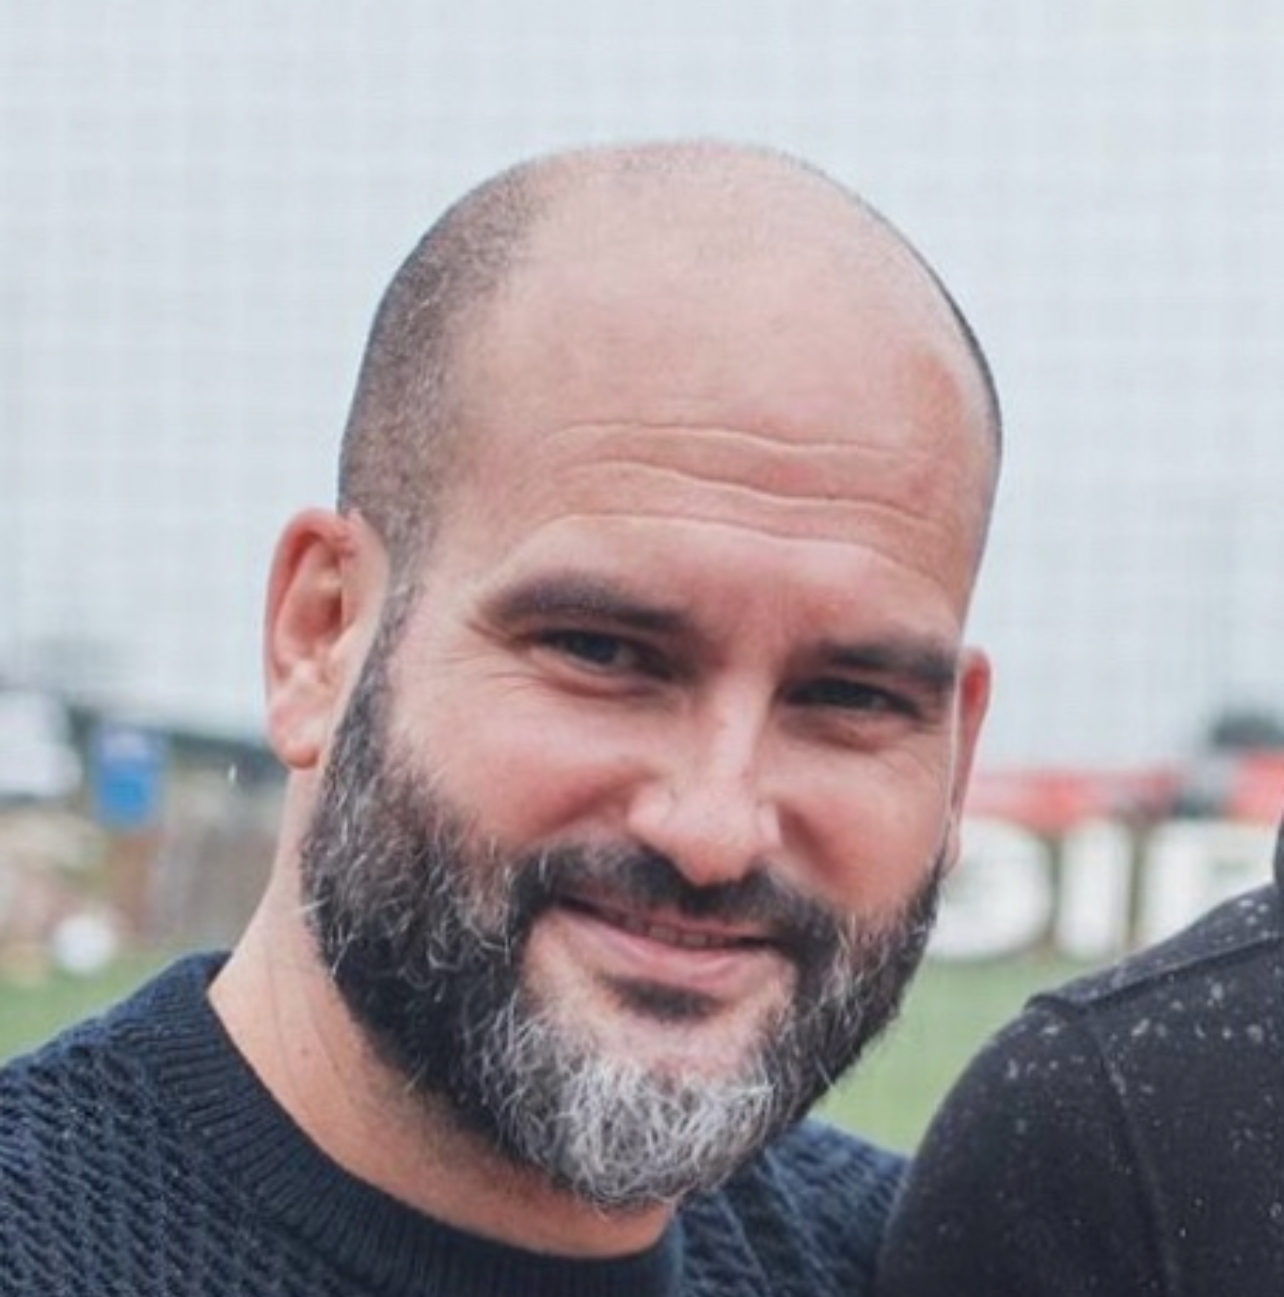

Probability being modified by Photoshop FAL: 99.49%
input


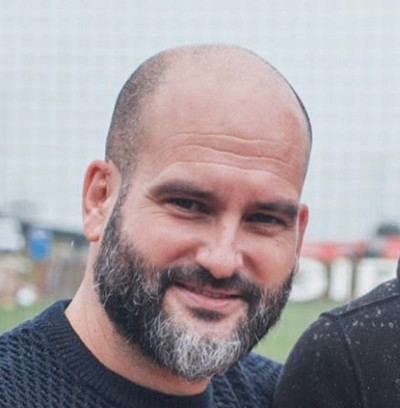

warped


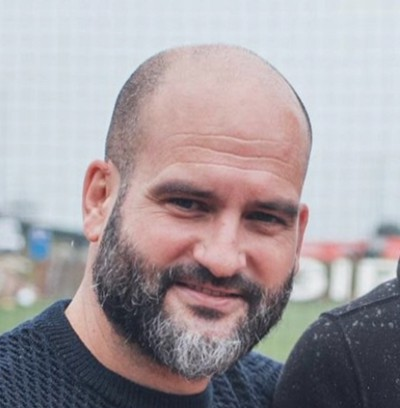

heatmap


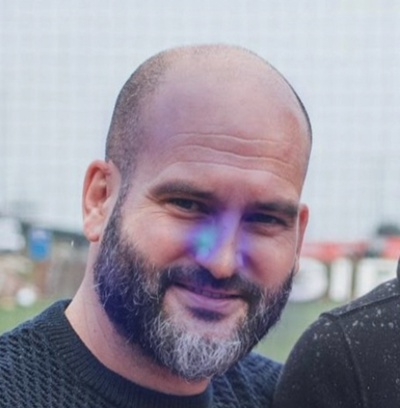

In [ ]:
def show(fname):
  display(IM(fname))

def global_classify(fname, crop=False):
  model = global_classifier.load_classifier("weights/global.pth", 0)
  prob = global_classifier.classify_fake(model, fname, not crop)
  print("Probability being modified by Photoshop FAL: {:.2f}%".format(prob*100))

def local_classify(fname, crop=False):
  img_path = fname
  dest_folder = "out"
  model_path = "/content/drive/MyDrive/*****/modelphotoshop.pth"
  # model_path = "weights/local.pth"
  no_crop = not crop
  device = 'cuda:{}'.format(0)
  model_flow = DRNSeg(2)
  state_dict = torch.load(model_path, map_location=device)
  # model.load_state_dict(state_dict['model'])
  model_flow.load_state_dict(torch.load(model_path))
  model_flow.to(device)
  model_flow.eval()
  tf = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
  ])
  im_w, im_h = Image.open(img_path).size
  if no_crop:
      face = Image.open(img_path).convert('RGB')
  else:
      faces = face_detection(img_path, verbose=False)
      if len(faces) == 0:
          print("no face detected by dlib, exiting")
          sys.exit()
      face, box = faces[0]
  face = resize_shorter_side(face, 400)[0]
  face_tens = tf(face).to(device)

  # Warping field prediction
  with torch.no_grad():
      flow = model_flow(face_tens.unsqueeze(0))[0].cpu().numpy()
      flow = np.transpose(flow, (1, 2, 0))
      h, w, _ = flow.shape

  # Undoing the warps
  modified = face.resize((w, h), Image.BICUBIC)
  modified_np = np.asarray(modified)
  reverse_np = warp(modified_np, flow)
  reverse = Image.fromarray(reverse_np)

  finput = os.path.join(dest_folder, 'cropped_input.jpg')
  fwarped = os.path.join(dest_folder, 'warped.jpg')
  fheat = os.path.join(dest_folder, 'heatmap.jpg')

  flow_magn = np.sqrt((0.4*flow[:, :, 0])**2 + (0.4*flow[:, :, 1])**2)

  # Saving the results
  modified.save(finput, quality=90)
  reverse.save(fwarped, quality=90)
  save_heatmap_cv(modified_np, flow_magn, fheat)

  print("input")
  show(finput)
  print("warped")
  show(fwarped)
  print("heatmap")
  show(fheat)
show(filename)
global_classify(filename)
local_classify(filename)